# Project 08-- Anthony Micco 

**TA Help:** N/A
    
**Collaboration:** N/A

## Question 1

In [2]:
library(data.table)

In [4]:
products <- fread("/anvil/projects/tdm/data/icecream/combined/products.csv")
reviews <- fread("/anvil/projects/tdm/data/icecream/combined/reviews.csv")

In [98]:
unique(trimws(unlist(strsplit(products$ingredients[1], ",|\\(|\\)"))))

[1] "CREAM"                     "SKIM MILK"                
 [3] "LIQUID SUGAR"              "SUGAR"                    
 [5] "WATER"                     ""                         
 [7] "BROWN SUGAR"               "MILK"                     
 [9] "WHEAT FLOUR"               "EGG YOLKS"                
[11] "CORN SYRUP"                "EGGS"                     
[13] "BUTTER"                    "SALT"                     
[15] "BUTTEROIL"                 "PECTIN"                   
[17] "SEA SALT"                  "SOYBEAN OIL"              
[19] "VANILLA EXTRACT"           "GUAR GUM"                 
[21] "SOY LECITHIN"              "BAKING POWDER"            
[23] "SODIUM ACID PYROPHOSPHATE" "SODIUM BICARBONATE"       
[25] "CORN STARCH"               "MONOCALCIUM PHOSPHATE"    
[27] "BAKING SODA"               "CARRAGEENAN"              
[29] "LACTASE"

In [99]:
getingredients <- function(x){
    unique(trimws(unlist(strsplit(x, ",|\\(|\\)"))))
}

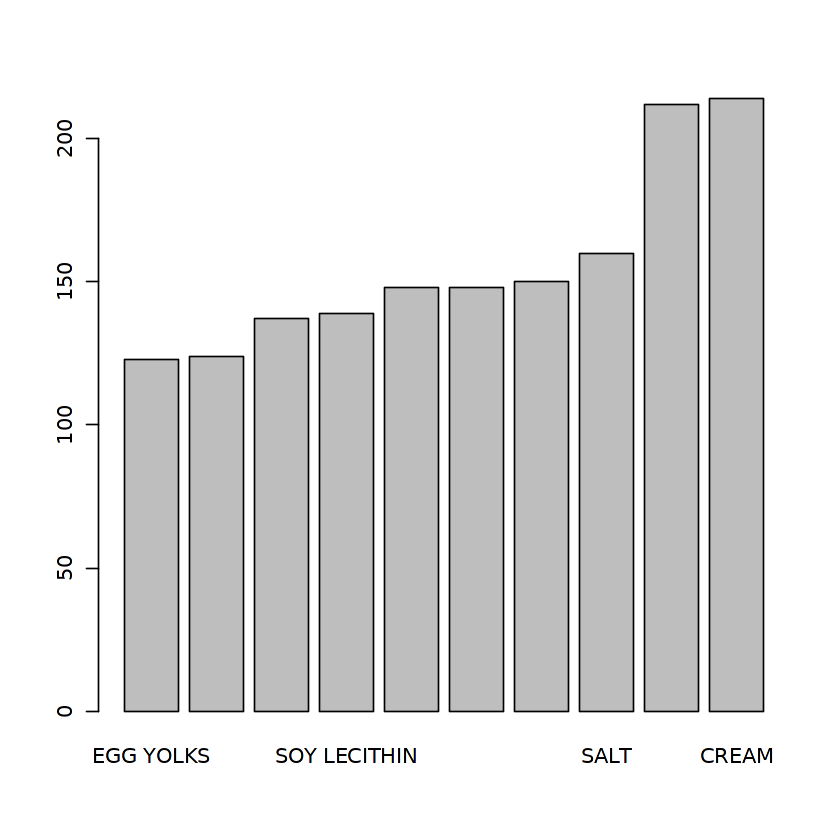

In [100]:
barplot(tail(sort(table(unlist(sapply(products$ingredients, getingredients),use.names=FALSE))),n=10))

In [45]:
table(reviews$stars)


    1     2     3     4     5 
 2404  1131  1060  1691 15388 

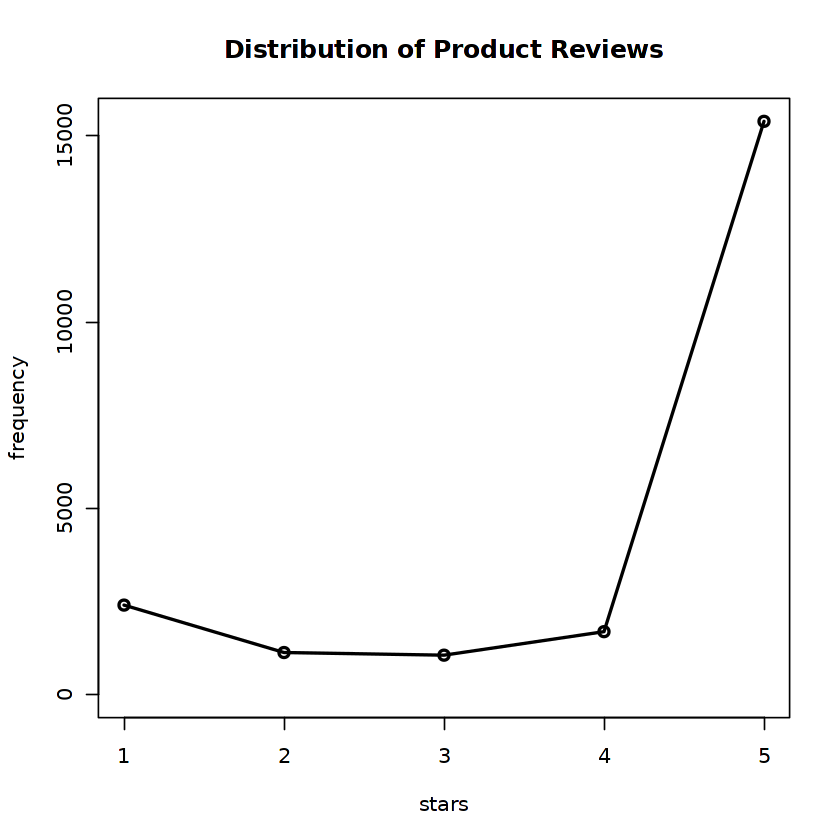

In [46]:
plot(table(reviews$stars), type="o",xlab="stars", ylab="frequency", main="Distribution of Product Reviews")

C) From the first graph we are learning which ingredients are used most in the products, while in the second graph we are learning how many times each rating was given out.  

## Question 2

In [48]:
products_reviews_by_rating <- function(products_df, reviews_df, myrating){ 
    merge_results <- merge(products_df, reviews_df, by="key")
    products_reviews_results <- merge_results[merge_results$rating >= myrating, ]
    return(products_reviews_results)
}

## Question 3

In [49]:
#Defines the function products_reviews_by_rating that takes in 3 parameters: products_df, reviews_df and myrating
products_reviews_by_rating <- function(products_df, reviews_df, myrating){ 
    
    #merges products_df and reviews_df using the key column and puts the result into merge_results
    merge_results <- merge(products_df, reviews_df, by="key")
    
    #uses indexing to find the ratings in the merge_results df that are greater than or equal to myrating and stores 
    #them in products_reviews_results.
    products_reviews_results <- merge_results[merge_results$rating >= myrating, ]
    
    #returns the value(s) of products_reviews_results
    return(products_reviews_results)
}

## Question 4

In [51]:
my_selection <- products_reviews_by_rating(products, reviews, 4.5)

In [54]:
dim(my_selection)

[1] 10293    20

A) There are 10293 products that have a rating of at least 4.5. 

## Question 5

In [112]:
numProducts <- function(x){
    hasIngredient <-trimws(unlist(strsplit(products$ingredients, ",|\\(|\\)")))
    num <- sum(hasIngredient==x) 
    return (num)
}

In [115]:
numProducts("SALT")

[1] 264

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.